In [134]:
from referendum_daily import *

In [165]:
# load the raw_data
Bastaunsi = convert_data('bastaunsi')
Iovotono = convert_data('iovotono')

Bastaunsi = Bastaunsi.dropna()
Iovotono = Iovotono.dropna()

In [166]:
Bastaunsi.to_csv('Bastaunsi.csv')
Iovotono.to_csv('Iovotono.csv')

[('https://t.co/SieovSBzFv', 89),
 ('https://t.co/Cw', 23),
 ('https://t.co/C4', 41),
 ('https://t.co/w75VmoIbPO', 31),
 ('https://t.co/HxqlnDKUiL', 120),
 ('https://t.co/OkDgg80Zjt', 27),
 ('https://t.co/4k6Sjr44OL', 29),
 ('https://t.co/mBTqtiP2ds', 21),
 ('https://t.co/6nmsVvxbzb', 35),
 ('https://t.co/mP1HacigwC', 39),
 ('https://t.co/FcV03HVCvf', 27),
 ('https://t.co/r4klthGpdr', 31),
 ('https://t.co/ZO', 33),
 ('https://t.co/pqP5dcLUaH', 31),
 ('https://t.co/veyA1ygrHt', 211),
 ('https://t.co/zDiSpH', 32),
 ('https://t.co/1534scYEgS', 23),
 ('https://t.co/GYjcHQHiJ4', 22),
 ('https://t.co/UiN', 32),
 ('https://t.co/7NHGGd2OP9', 33),
 ('https://t.co/Uvay7D6mAQ', 40),
 ('https://t.co/oDAnikVm0A', 49),
 ('https://t.co/T2qWmUHzEU', 32),
 ('https://t.co/WvhIQXv9s4', 26),
 ('https://t.co/WKmqNS9Cfc', 38),
 ('https://t.co/6Wg2PJWIZ2', 26),
 ('https://t.co/kiifPsnt', 163),
 ('https://t.co/EZOeSQMn1y', 650),
 ('https://t.co/bAK0KuBP3H', 36),
 ('https://t.co/wjKklAZ0PL', 29),
 ('https://t.

In [ ]:
from bokeh.charts import TimeSeries, show, output_file
from bokeh.io import gridplot, output_file, show
from bokeh.plotting import figure
from bokeh.models import BoxAnnotation


yes_count = list(Bastaunsi.groupby('date').count()['id'])
no_count = list(Iovotono.groupby('date').count()['id'])

retweet_yes = list(Bastaunsi.groupby('date').sum()['retweet_count'])
favourite_yes = list(Bastaunsi.groupby('date').sum()['favorite_count'])

retweet_no = list(Iovotono.groupby('date').sum()['retweet_count'])
favourite_no = list(Iovotono.groupby('date').sum()['favorite_count'])

x = np.array([dt.datetime.strptime(d, '%Y-%m-%d') for d in date])

xyvalues_count = dict([
        #('yes', yes_count),
        #('no', no_count),
        ('ratio', [float(yes_count[i])/no_count[i] for i in range(len(yes_count))]),
        ('Date', x)]
    )


xyvalues_retweet = dict([
        #('retweet_yes', retweet_yes),
        #('retweet_no', retweet_no),
        ('retweet_ratio', [float(retweet_yes[i])/retweet_no[i] for i in range(len(retweet_yes))]),
        ('Date', x)]
    )

xyvalues_favourite = dict([
        #('favourite_yes', favourite_yes),
        #('favourite_no', favourite_no),
        ('favourite_ratio', [float(favourite_yes[i])/favourite_no[i] for i in range(len(favourite_yes))]),
        ('Date', x)]
    )


output_file("Final.html")

p1 = TimeSeries(xyvalues_count, x='Date', legend=True,plot_width=1300, plot_height=250,
               title="count", ylabel='Number')

p2 = TimeSeries(xyvalues_retweet, x='Date', legend=True,plot_width=1300, plot_height=250,
               title="retweet", ylabel='Number')

p3 = TimeSeries(xyvalues_favourite, x='Date', legend=True,plot_width=1300, plot_height=250,
               title="favourite", ylabel='Number')

# put all the plots in a grid layout
p = gridplot([[p1],[p2],[p3]])

# show the results
show(p)

In [ ]:
Count_daily = pd.DataFrame.from_dict(xyvalues_count)
Retweet_daily = pd.DataFrame.from_dict(xyvalues_retweet)
Favourite_daily = pd.DataFrame.from_dict(xyvalues_favourite)
dfs = [Count_daily, Retweet_daily,Favourite_daily]
Daily_Stat = reduce(lambda left,right: pd.merge(left,right,on='Date'), dfs)
Daily_Stat.to_csv('Daily_Stat.csv')

In [2]:
Bastaunsi_It = pd.read_csv('2016-10-03/Bastaunsi_It.csv')
Iovotono_It = pd.read_csv('2016-10-03/Iovotono_It.csv')

In [3]:
Bastaunsi_It = Bastaunsi_It.dropna()
Iovotono_It = Iovotono_It.dropna()
# Why there are NA values?

In [4]:
# get the clean text format
Bastaunsi_It['clean_text'] = Bastaunsi_It['text'].apply(get_clean1)
Iovotono_It['clean_text'] = Iovotono_It['text'].apply(get_clean1)

Bastaunsi_Final = Bastaunsi_It[Bastaunsi_It['clean_text'] != 1]
Iovotono_Final = Iovotono_It[Iovotono_It['clean_text'] != 1]
SioNo_Final = pd.concat([Bastaunsi_Final,Iovotono_Final])

KeyboardInterrupt: 

In [5]:
# get the clean text format, unstemmed version
Bastaunsi_It['clean_text1'] = Bastaunsi_It['text'].apply(get_clean)
Iovotono_It['clean_text1'] = Iovotono_It['text'].apply(get_clean)

Bastaunsi_Final = Bastaunsi_It[Bastaunsi_It['clean_text1'] != 1]
Iovotono_Final = Iovotono_It[Iovotono_It['clean_text1'] != 1]
SioNo_Final = pd.concat([Bastaunsi_Final,Iovotono_Final])

In [6]:
SioNo_Final.shape

(126693, 8)

In [7]:
ngram_yes = DTM()
for f in Bastaunsi_Final['clean_text1']:
    ngram_yes.add_doc(f)
    
ngram_no = DTM()
for f in Iovotono_Final['clean_text1']:
    ngram_no.add_doc(f)
    
ngram_siono = DTM()
for f in SioNo_Final['clean_text1']:
    ngram_siono.add_doc(f)

In [107]:
bastaunsi_dict = {}
iovotono_dict = {}
siono_dict = {}

for i in Bastaunsi_Final['clean_text']:
    for j in i:
        bastaunsi_dict[j] = bastaunsi_dict.get(j,0) + 1

for i in Iovotono_Final['clean_text']:
    for j in i:
        iovotono_dict[j] = iovotono_dict.get(j,0) + 1
        
for i in SioNo_Final['clean_text']:
    for j in i:
        siono_dict[j] = siono_dict.get(j,0) + 1

In [180]:
pd.DataFrame(bastaunsi_dict.items(), columns=['words','freq']).to_csv('Final_bastaunsi.csv')
pd.DataFrame(iovotono_dict.items(), columns=['words','freq']).to_csv('Final_iovotono.csv')

In [156]:
temp_yes = [k for k, v in bastaunsi_dict.items() if v > 2000]
temp_no = [k for k, v in iovotono_dict.items() if v > 3000]

In [157]:
common_words = set(temp_yes )& set(temp_no)
temp = []
for l in common_words:
    if l != 'iovot':
        temp.append((l,bastaunsi_dict.get(l),'yes'))
        temp.append((l,-iovotono_dict.get(l),'no'))
Temp = pd.DataFrame(temp,columns = ['words','freq','yes/no'])
Temp

,words,freq,yes/no
0,riformacostituzional,2323,yes
1,riformacostituzional,-3317,no
2,referendum,3393,yes
3,referendum,-8014,no
4,dicembr,3337,yes
5,dicembr,-9636,no
6,vot,4215,yes
7,vot,-9548,no
8,riform,3456,yes
9,riform,-5814,no


In [163]:
%matplotlib inline
import seaborn as sns
sns.set_context(rc={"figure.figsize": (15, 5)})

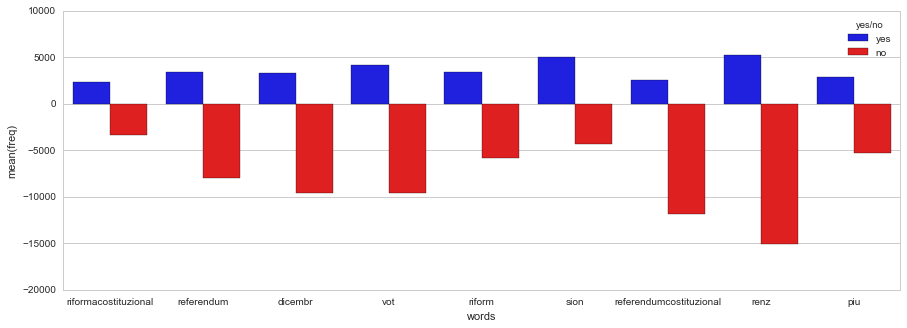

In [177]:
ax = sns.barplot(x="words", y="freq", hue="yes/no",data=Temp,palette={"yes": "b", "no": "r"},)
fig = ax.get_figure()
fig.savefig('siono.png')

AttributeError: 'AxesSubplot' object has no attribute 'show'

In [121]:
set(temp_yes ) & set(temp_no)

{u'cos',
 u'dicembr',
 u'iovot',
 u'ital',
 u'perc',
 u'piu',
 u'referendum',
 u'referendumcostituzional',
 u'renz',
 u'riform',
 u'riformacostituzional',
 u'sion',
 u'vot',
 u'zagrebelsky'}

In [8]:
ngram_yes.write_csv('dtm_yes.csv',100)
ngram_no.write_csv('dtm_no.csv',100)
#ngram_siono.write_csv('dtm_siono.csv',100)

In [ ]:
# TF-IDF weight
def get_tf(dtm):
    rows = dtm.rows(cutoff = 100)
    words = next(rows)

    data = np.zeros(shape = [len(dtm.sparse),len(words)])
    i = 0
    for row in rows:
        data[i,:] = row
        i = i + 1
        
    tf_data = np.zeros(shape = data.shape)
    row_sum = np.sum(data,axis=1)
    col_sum = np.sum(data > 0,axis = 0)
    I,J = data.shape
    
    for i in range(I):
        for j in range(J):
            if data[i,j] != 0:
                tf_data[i,j] = (float(data[i,j])/row_sum[i]) * (float(1 + np.log(J))/(1 + np.log(col_sum[j])))
    tf_dataframe = pd.DataFrame(tf_data,columns = words)
    return tf_dataframe

tf_yes = get_tf(ngram_yes)
tf_no = get_tf(ngram_no)

In [ ]:
tf_yes.to_csv('tf_yes.csv')
tf_no.to_csv('tf_no.csv')

In [12]:
rows = ngram_siono.rows(cutoff = 100)
words = next(rows)
len(words)

1411

In [13]:
dataset = np.zeros(shape = [len(ngram_siono.sparse),len(words) + 1])
i = 0
for row in rows:
    if i < len(ngram_yes.sparse):
        dataset[i,:] = row + [1]
    else:
        dataset[i,:] = row + [0]
    i = i + 1

134980

In [5]:
dataset = pd.read_csv('dtm_siono.csv')

target = pd.DataFrame([1] * len(ngram_yes.sparse) + [0] * len(ngram_no.sparse))

raw_data = pd.concat([dataset, target], axis=1)
raw_data.columns = list(dataset.columns) + ['y']

#Dtm_siono = raw_data.loc[(raw_data.sum(axis=1) != 0),]

NameError: name 'ngram_yes' is not defined

In [14]:
m,n = dataset.shape
print m
print n

126693
1412


In [10]:
print len(ngram_yes.sparse)
print len(ngram_no.sparse)

39036
87651


In [11]:
def model_assessment(DTM,Model):
    m,n = DTM.shape
    np_siono = DTM.as_matrix()
    train, test = train_test_split(DTM, test_size = 0.2)
    train = train.as_matrix()
    test = test.as_matrix()
    model = Model
    model.fit(train[:,0:n-1],train[:,n-1])
    expected = test[:,n-1]
    predicted = model.predict(test[:,0:n-1])
    matrix = metrics.confusion_matrix(expected, predicted)
    prob = float((matrix[0,0] + matrix[1,1]))/np.sum(matrix)
    coef_prob = model.predict_proba(np_siono[:,0:n-1])
    return prob,coef_prob

In [15]:
train, test = train_test_split(dataset, test_size = 0.2)
def model_assessment(DTM,Model,train,test):
    m,n = DTM.shape
    #train, test = train_test_split(DTM, test_size = 0.2)
    model = Model
    model.fit(train[:,0:n-1],train[:,n-1])
    expected = test[:,n-1]
    predicted = model.predict(test[:,0:n-1])
    matrix = metrics.confusion_matrix(expected, predicted)
    prob = float((matrix[0,0] + matrix[1,1]))/np.sum(matrix)
    coef_prob = model.predict_proba(DTM[:,0:n-1])
    return prob,coef_prob

In [16]:
Ridge = model_assessment(dataset,LogisticRegression(),train,test)
Lasso = model_assessment(dataset,LogisticRegression(penalty = 'l1'),train,test)
Tree = model_assessment(dataset,DecisionTreeClassifier(),train,test)

In [51]:
print Ridge[0]
print Lasso[0]
print Tree[0]

0.977898808114
0.977740942458
0.971268450549


In [17]:
print Ridge[0]
print Lasso[0]
print Tree[0]

0.9773866372
0.977702356052
0.972414065275


In [58]:
def model_assessment(DTM,Model):
    m,n = DTM.shape
    np_siono = DTM.as_matrix()
    train, test = train_test_split(DTM, test_size = 0.2)
    train = train.as_matrix()
    test = test.as_matrix()
    model = Model
    model.fit(train[:,0:n-1000],train[:,n-1])
    expected = test[:,n-1]
    predicted = model.predict(test[:,0:n-1000])
    matrix = metrics.confusion_matrix(expected, predicted)
    prob = float((matrix[0,0] + matrix[1,1]))/np.sum(matrix)
    coef_prob = model.predict_proba(np_siono[:,0:n-1000])
    return prob,coef_prob

In [18]:
import findspark
import os
findspark.init()

In [100]:
from pyspark.mllib.classification import SVMWithSGD, SVMModel
from pyspark.mllib.regression import LabeledPoint

# Load and parse the data
def parsePoint(line):
    values = [float(x) for x in line.split(',')]
    return LabeledPoint(values[1411], values[0:1411])

In [49]:
from pyspark import SparkContext
sc =SparkContext()

ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=pyspark-shell, master=local[*]) created by __init__ at <ipython-input-25-de3c65215398>:2 

In [103]:
data_train = sc.textFile("train.txt")
data_test = sc.textFile("test.txt")
parsedData_train = data_train.map(parsePoint)
parsedData_test = data_test.map(parsePoint)

In [99]:
np.savetxt('train.txt', train, delimiter=',') 
np.savetxt('test.txt', test, delimiter=',') 

1412

In [126]:
# Build the model
model = SVMWithSGD.train(parsedData_train, iterations=1000,convergenceTol = 0.0001)

# Evaluating the model on training data
labelsAndPreds = parsedData_test.map(lambda p: (p.label, model.predict(p.features)))
testErr = labelsAndPreds.filter(lambda (v, p): v != p).count() / float(parsedData_test.count())
print("Test Error = " + str(testErr))

0.9768735940644856

In [133]:
from pyspark.mllib.tree import RandomForest, RandomForestModel
from pyspark.mllib.util import MLUtils

model = RandomForest.trainClassifier(parsedData_train, numClasses=2, categoricalFeaturesInfo={},
                                     numTrees=3, featureSubsetStrategy="auto",
                                     impurity='gini', maxDepth=4, maxBins=32)

# Evaluate model on test instances and compute test error
predictions = model.predict(parsedData_test.map(lambda x: x.features))
labelsAndPredictions = parsedData_test.map(lambda lp: lp.label).zip(predictions)
testErr = labelsAndPredictions.filter(lambda (v, p): v != p).count() / float(parsedData_test.count())
print('Test Error = ' + str(testErr))
#print('Learned classification forest model:')
#print(model.toDebugString())

Test Error = 0.301787758001


In [132]:
from pyspark.mllib.tree import GradientBoostedTrees, GradientBoostedTreesModel
from pyspark.mllib.util import MLUtils

model = GradientBoostedTrees.trainClassifier(parsedData_train,
                                             categoricalFeaturesInfo={}, numIterations=3)

# Evaluate model on test instances and compute test error
predictions = model.predict(parsedData_test.map(lambda x: x.features))
labelsAndPredictions = parsedData_test.map(lambda lp: lp.label).zip(predictions)
testErr = labelsAndPredictions.filter(lambda (v, p): v != p).count() / float(parsedData_test.count())
print('Test Error = ' + str(testErr))

Test Error = 0.0265203835984


In [ ]:
SVM = model_assessment(raw_data,Model = SVC(probability=True))
KNN = model_assessment(raw_data,Model = KNeighborsClassifier())

In [41]:
print KNN[0]
print SVM[0]

NameError: name 'KNN' is not defined

In [14]:
prob_list = [Ridge[1][:,1],Lasso[1][:,1],Tree[1][:,1]]
Prob = np.zeros(shape=(Ridge[1].shape[0],3))
for i in range(3):
    Prob[:,i] = prob_list[i]

In [15]:
SioNo_Final

,Unnamed: 0,created_at,text,retweet_count,favorite_count,id,lan,clean_text
0,0,2016-09-16 23:53:17,RT @molinaro_enrico: @bobogiac: Massimo non me...,1.0,0.0,7.769320e+17,it,"[massim, ment, stat, elett, porcellum, dalem, ..."
1,1,2016-09-16 23:47:05,D'Alema e #Smuraglia sono i migliori sponsor c...,1.0,3.0,7.769304e+17,it,"[dalem, smuragl, miglior, sponsor, pot, trov, ..."
2,2,2016-09-16 23:45:45,RT @BelpassiJessica: E @bobogiac lascia senza ...,18.0,0.0,7.769301e+17,it,"[lasc, parol, dalem, ricord, punt, programm, o..."
3,3,2016-09-16 23:45:08,RT @aldorosati: Le leggi elettorali si fanno p...,12.0,0.0,7.769299e+17,it,"[legg, elettoral, cap, poss, govern, giachett,..."
4,4,2016-09-16 23:44:54,RT @BelpassiJessica: Vorrei ricordare a #Dalem...,14.0,0.0,7.769299e+17,it,"[vorre, ricord, dalem, riform, costituzional, ..."
5,5,2016-09-16 23:44:12,RT @AndreaMarcucci: In sintesi: non c'è riusci...,54.0,0.0,7.769297e+17,it,"[sintes, ce, riusc, nonost, crost, riform, vuo..."
6,6,2016-09-16 23:44:09,RT @aldorosati: Le leggi elettorali si fanno p...,12.0,0.0,7.769297e+17,it,"[legg, elettoral, cap, poss, govern, giachett,..."
7,7,2016-09-16 23:43:38,"RT @danielecina: Col ""patto della crostata"" ne...",28.0,0.0,7.769296e+17,it,"[patt, crost, treccan, giachett, mett, ko, dal..."
8,8,2016-09-16 23:40:28,RT @bellini281: @bobogiac @bastaunsi Se l'arro...,4.0,0.0,7.769288e+17,it,"[larrog, nom, chiam, dalem, bastauns]"
9,9,2016-09-16 23:38:33,RT @AndreaMarcucci: In sintesi: non c'è riusci...,54.0,0.0,7.769283e+17,it,"[sintes, ce, riusc, nonost, crost, riform, vuo..."


In [33]:
Temp = pd.DataFrame(Prob,columns = ['ridge','lasso','tree'])
Temp1 = np.concatenate([SioNo_Final[['created_at','text','retweet_count','favorite_count','id']].as_matrix(),Temp.as_matrix()],axis = 1)
Final = pd.DataFrame(Temp1,columns = ['created_at','text','retweet_count','favorite_count','id','ridge','lasso','tree'])
Final.to_csv('Prob_revise.csv')

In [34]:
Final.shape

(126687, 8)

In [31]:
SioNo_Final.shape

(126687, 8)